# http://bit.ly/dri18-ml

# Before Lunch?
 * Open, filter, and search spreadsheets
 * Compute & plot descriptive statistics
 * Generate cross tabulations (group by/pivot table)
 * Remove missing and invalid data
 * Numerically encode and Z-score normalize variables
 * Reduce data dimensions using Principal Component Analysis
 * Cluster and classifiy data using nearest neighbor approaches 
 * Evaluate algorithm's accuracy and compute confusion matrix
 

![Titanic](figs/RMS_titanic_3.jpg)

# [Kaggle Titanic Data](https://www.kaggle.com/c/titanic/data)

VARIABLE DESCRIPTIONS
=====================
```
survival: Survival (0 = No; 1 = Yes)|
pclass: Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
name: Name
sex: Sex
age: Age
```

VARIABLE DESCRIPTIONS
=====================
```
sibsp: Number of Siblings/Spouses Aboard
parch: Number of Parents/Children Aboard
ticket: Ticket Number
fare: Passenger Fare
cabin: Cabin
embarked: Port of Embarkation 
    (C = Cherbourg; Q = Queenstown; S = Southampton)
```

SPECIAL NOTES
==============
```
Pclass is a proxy for socio-economic status (SES)
 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower

Age is in Years; Fractional if Age less than One (1)
 If the Age is Estimated, it is in the form xx.5
```

Family Notes
============
```
With respect to the family relation variables (i.e. sibsp and parch)
some relations were ignored.  The following are the definitions used
for sibsp and parch.

Sibling:  Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic
Spouse:   Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances Ignored)
Parent:   Mother or Father of Passenger Aboard Titanic
Child:    Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic

Other family relatives excluded from this study include cousins,
nephews/nieces, aunts/uncles, and in-laws.  Some children travelled
only with a nanny, therefore parch=0 for them.  As well, some
travelled with very close friends or neighbors in a village, however,
the definitions do not support such relations.
```


In [4]:
import pandas as pd
print(f'pandas: {pd.__version__}')

import numpy as np
print(f'numpy: {np.__version__}')

import matplotlib
import matplotlib.pyplot as plt
print(f'matplotlib: {matplotlib.__version__}')

In [5]:
# read csv can read from a file path or a url
df = pd.read_csv("http://bit.ly/tscv17")
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
#What do we have, what type is it, and what's missing?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [7]:
#how do we take a statistical snapshot?
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
# what if we also want categorical descriptions?
df.describe?

In [10]:
# the docs say to use the include keyword and 'O' argument
df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Tornquist, Mr. William Henry",male,1601,C23 C25 C27,S
freq,1,577,7,4,644


In [11]:
# How do we see how many people survived?  1=Survived
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [27]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [24]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

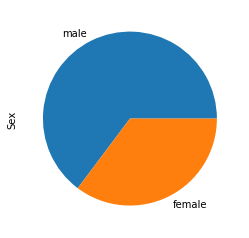

In [23]:
%matplotlib inline
fig, ax = plt.subplots()
df['Sex'].value_counts().plot.pie(ax=ax)#, #labels=["Died", "Lived"])
ax.set_aspect('equal') # this makes it a circle

Challenge
=====
* Print the value counts of another variable (example: cabin)
* Create a pie chart for another variable

In [67]:
# What if we want to see how the people who survived differ from those who deid?
df.groupby(['Survived'])

In [68]:
list(df.groupby(['Survived']))

[(0,      PassengerId  Survived  Pclass  \
  0              1         0       3   
  4              5         0       3   
  5              6         0       3   
  6              7         0       1   
  7              8         0       3   
  12            13         0       3   
  13            14         0       3   
  14            15         0       3   
  16            17         0       3   
  18            19         0       3   
  20            21         0       2   
  24            25         0       3   
  26            27         0       3   
  27            28         0       1   
  29            30         0       3   
  30            31         0       1   
  33            34         0       2   
  34            35         0       1   
  35            36         0       1   
  37            38         0       3   
  38            39         0       3   
  40            41         0       3   
  41            42         0       2   
  42            43         0       3 

In [32]:
# How do we get a summary of that?
df.groupby(['Survived']).count()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Survived,,,,,,,,,,,
0,549,549,549,549,424,549,549,549,549,68,549
1,342,342,342,342,290,342,342,342,342,136,340


In [33]:
#how do we now disaggregate the data to compute a cross tabulation?
by_demo = df.groupby(['Sex', 'Pclass'])
#unstack creates the table
by_demo['Survived'].count()

Sex     Pclass
female  1          94
        2          76
        3         144
male    1         122
        2         108
        3         347
Name: Survived, dtype: int64

In [37]:
# Can we put it into a table?
by_demo['Survived'].sum().unstack() 

Pclass,1,2,3
Sex,,,
female,91,70,72
male,45,17,47


In [41]:
#Let's compute a survival rate
Survival_rate = by_demo['Survived'].sum()/by_demo['Survived'].count()
Survival_rate

Sex     Pclass
female  1         0.968085
        2         0.921053
        3         0.500000
male    1         0.368852
        2         0.157407
        3         0.135447
Name: Survived, dtype: float64

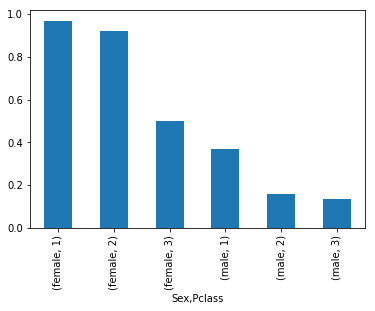

In [40]:
# And let's plot that
%matplotlib inline
Survival_rate.plot.bar()

# can we group?
Survival_rate.unstack().plot.bar()
Survival_rate.unstack()

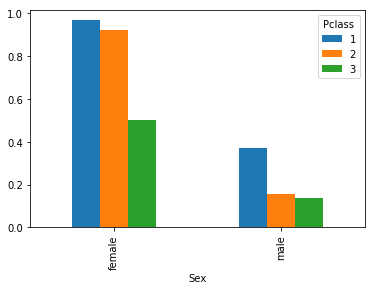

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [46]:
Survival_rate.unstack().plot.bar()
plt.show()
Survival_rate.unstack()

Sex,female,male
Pclass,,
1,0.968085,0.368852
2,0.921053,0.157407
3,0.500000,0.135447


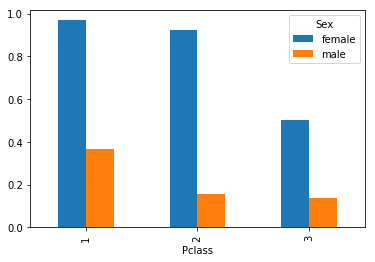

In [48]:
#what about grouped by sex first?
# can we group?
Survival_rate.unstack().T.plot.bar()
Survival_rate.unstack().T

In [65]:
corr = df.corr()
corr[corr<1]

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,NaN,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,NaN,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,NaN,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,NaN,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,NaN,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,NaN,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,NaN


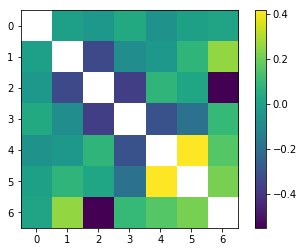

In [63]:
corr = df.corr().values
corr[corr==1] = np.nan
# Is there a correlation?
fig, ax = plt.subplots()
im = ax.imshow(corr)
fig.colorbar(im)

In [66]:
#What if we want to apply different aggregations to different columns?
#{'key':value} is a Python data structure called a dictionary
df.groupby(['Pclass', 'Sex']).agg( {'Survived': np.sum, 
                                    'Fare': np.mean, 
                                    'Age': np.median})

Survived        Fare   Age
Pclass Sex                               
1      female        91  106.125798  35.0
       male          45   67.226127  40.0
2      female        70   21.970121  28.0
       male          17   19.741782  30.0
3      female        72   16.118810  21.5
       male          47   12.661633  25.0

In [83]:
df['Fareq'] = pd.qcut(df['Fare'], 10)

Challenge
=====
* Compute a cross tabulation using a different variable in the dataset
* Plot a chart that illustrates your findings
* If possible, compute the correlation between survival and that variable

In [74]:
df['Family'] = df['SibSp'] + df['Parch']
df[['Family', 'Parch', 'SibSp']].head()

,Family,Parch,SibSp
0,1,0,1
1,1,0,1
2,0,0,0
3,1,0,1
4,0,0,0


![mult](figs/multivariate.png)

![ml](figs/ml_map.png)

# Where do we start? axis notation 
![axis](figs/axis.jpg)
source: [stackoverflow](http://stackoverflow.com/questions/25773245/ambiguity-in-pandas-dataframe-numpy-array-axis-definition)

In [84]:
# names and ticket #s are too complicated and passengerID has no meaning
# drop survived since to an extent that's what we're trying to uncover
# axis = 1 means that these are columns
df_filtered = df.drop(["Name", "Ticket", "PassengerId", "Survived"], 
                      axis=1)
#Now what's missing?
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
Family      891 non-null int64
Fareq       891 non-null category
dtypes: category(1), float64(2), int64(4), object(3)
memory usage: 63.8+ KB


In [85]:
#We're missing so much cabin data that it makes sense to drop it as a first pass
df_c = df_filtered.drop(["Cabin"], axis=1)
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    889 non-null object
Family      891 non-null int64
Fareq       891 non-null category
dtypes: category(1), float64(2), int64(4), object(2)
memory usage: 56.8+ KB


How do we find the ~170 missing rows? Fancy Indexing
==========================
![masking](figs/masking.png)

modified from [software carpentry](http://v4.software-carpentry.org/matrix/indexing.html)


In [86]:
#isnull - is any cell missing a value? 
#any(axis=1) - which rows have at least 1 missing value?
bad_rows = df_c.isnull().any(axis=1)
#true = 1, false = 0, so sum() gives total # true
print(bad_rows.sum(), "missing rows")

179 missing rows


In [87]:
#~ means not, so ~bad_rows => good rows
df_clean = df_c[~bad_rows]
survived = df['Survived'][~bad_rows]

#What state is our data in now?
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 9 columns):
Pclass      712 non-null int64
Sex         712 non-null object
Age         712 non-null float64
SibSp       712 non-null int64
Parch       712 non-null int64
Fare        712 non-null float64
Embarked    712 non-null object
Family      712 non-null int64
Fareq       712 non-null category
dtypes: category(1), float64(2), int64(4), object(2)
memory usage: 50.9+ KB


# How do we deal with catagories and text? One-Hot Coding
![one-hot](figs/word2vec-one-hot.png)
source: [Amazing Power of Word Vectors](http://www.kdnuggets.com/2016/05/amazing-power-word-vectors.html)

In [88]:
#Let's one-hot code Pclass, Sex, & Embarked
#http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html
df_coded = pd.get_dummies(df_clean, 
                          columns=["Pclass", "Sex", "Embarked"])
df_coded.head()

,Age,SibSp,Parch,Fare,Family,Fareq,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,22.0,1,0,7.2500,1,"(-0.001, 7.55]",0,0,1,0,1,0,0,1
1,38.0,1,0,71.2833,1,"(39.688, 77.958]",1,0,0,1,0,1,0,0
2,26.0,0,0,7.9250,0,"(7.854, 8.05]",0,0,1,1,0,0,0,1
3,35.0,1,0,53.1000,1,"(39.688, 77.958]",1,0,0,1,0,0,0,1
4,35.0,0,0,8.0500,0,"(7.854, 8.05]",0,0,1,0,1,0,0,1


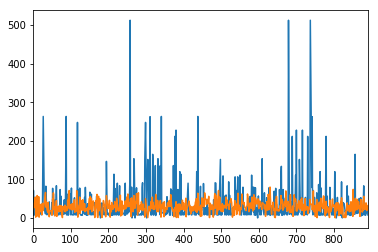

In [89]:
df_coded['Fare'].plot()
df_coded['Age'].plot()
plt.show() #removes matplotlib text under graph

In [90]:
# need to put continuous numerical values on comparable scale (normalize them)
def zscore(x):
    return ((x - x.mean())/x.std()) 

df_coded['AgeN'] = zscore(df_coded['Age'].values)
df_coded['FareN'] = zscore(df_coded['Fare'].values)


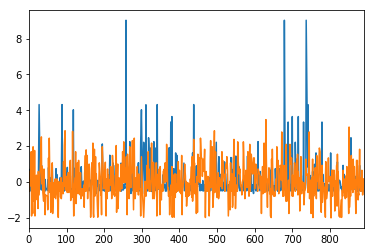

In [91]:
df_coded['FareN'].plot()
df_coded['AgeN'].plot()
plt.show()

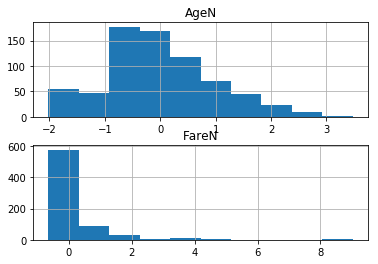

In [92]:
# What's the distribution of these?

fig, (ax1, ax2) = plt.subplots(nrows=2)
df_coded[['AgeN','FareN']].hist(ax = (ax1, ax2))
plt.show()

In [94]:
#now it's a feature vector as far as our algs are concerned
dfFV = df_coded.drop(["Age", "Fare"], axis=1)
dfFV.head()

,SibSp,Parch,Family,Fareq,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,AgeN,FareN
0,1,0,1,"(-0.001, 7.55]",0,0,1,0,1,0,0,1,-0.527669,-0.516380
1,1,0,1,"(39.688, 77.958]",1,0,0,1,0,1,0,0,0.577094,0.694046
2,0,0,0,"(7.854, 8.05]",0,0,1,1,0,0,0,1,-0.251478,-0.503620
3,1,0,1,"(39.688, 77.958]",1,0,0,1,0,0,0,1,0.369951,0.350326
4,0,0,0,"(7.854, 8.05]",0,0,1,0,1,0,0,1,0.369951,-0.501257


In [95]:
#let's save this cleaned dataset
dfFV.to_csv("titanic_FV.csv", index=False)
#and let's save out the survived column of the 
survived.to_csv("survived.csv", index=False)

In [96]:
ls 

Jan2017.ipynb         cat_ts_2.ipynb        jan2018_stats2.ipynb
Jan2018_ml.ipynb      data/                 survived.csv
Jan2018_stats.ipynb   dim_fig.ipynb         titanic.ipynb*
README.md             figs/                 titanic_FV.csv
cat_ts_1.ipynb        grad.ipynb
